In [6]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
from scipy.signal.windows import gaussian

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\1675482042.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,3,4), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\1675482042.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,3,5), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\1675482042.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))


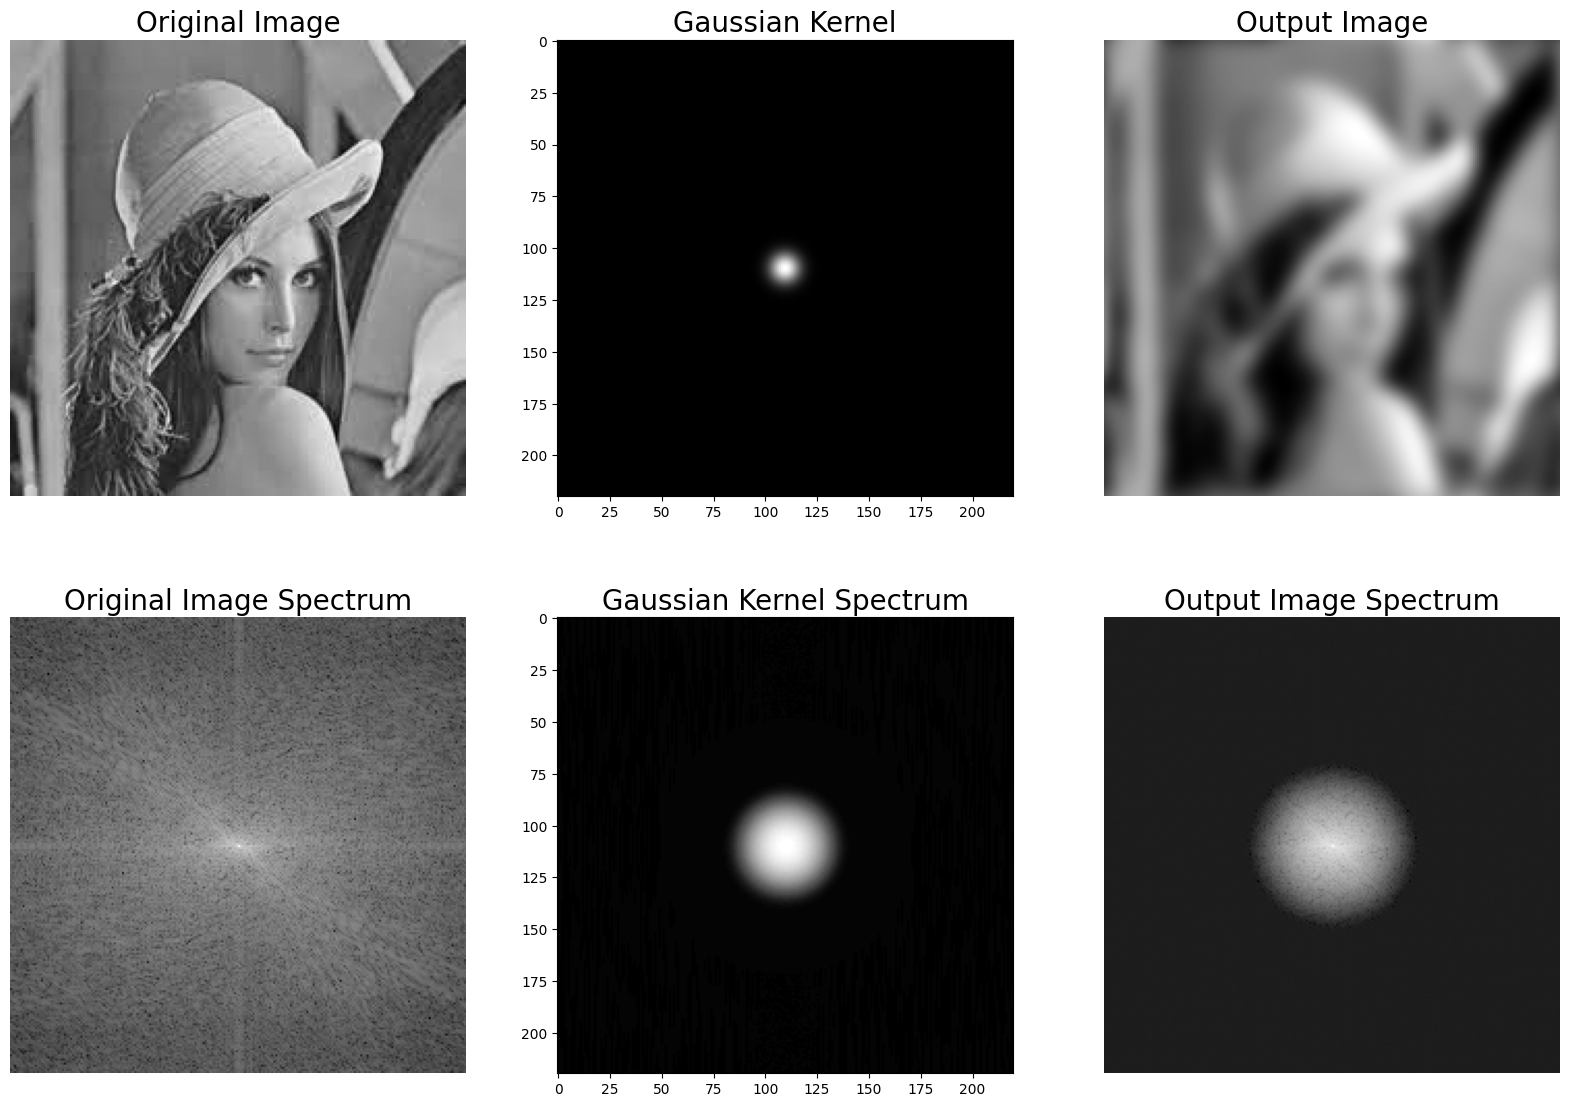

In [9]:
pylab.figure(figsize=(20,15))
pylab.gray()
im = np.mean(imread('D:/ĐH/Xử lý ảnh/BTL/images/lena.jpg'), axis=2)
gauss_kernel = np.outer(gaussian(im.shape[0], 5), gaussian(im.shape[1], 5))
freq = fp.fft2(im)
assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
convolved = freq*freq_kernel 
im1 = fp.ifft2(convolved).real
pylab.subplot(2,3,1), pylab.imshow(im), pylab.title('Original Image', size=20), pylab.axis('off')
pylab.subplot(2,3,2), pylab.imshow(gauss_kernel), pylab.title('Gaussian Kernel', size=20)
pylab.subplot(2,3,3), pylab.imshow(im1) # the imaginary part is an artifact
pylab.title('Output Image', size=20), pylab.axis('off')
pylab.subplot(2,3,4), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
pylab.title('Original Image Spectrum', size=20), pylab.axis('off')
pylab.subplot(2,3,5), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int))
pylab.title('Gaussian Kernel Spectrum', size=20), pylab.subplot(2,3,6)
pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))
pylab.title('Output Image Spectrum', size=20), pylab.axis('off')
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

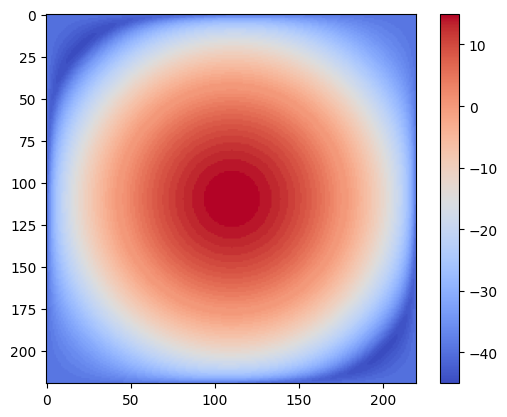

In [10]:
im = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/lena.jpg'))
gauss_kernel = np.outer(gaussian(im.shape[0], 1), gaussian(im.shape[1], 1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
pylab.imshow( (20*np.log10( 0.01 +
fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm')
pylab.colorbar()
pylab.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\3052393137.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.mean(imageio.imread('D:/ĐH/Xử lý ảnh/BTL/images/mandrill.jpg'), axis=2)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\3052393137.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(224, 225)


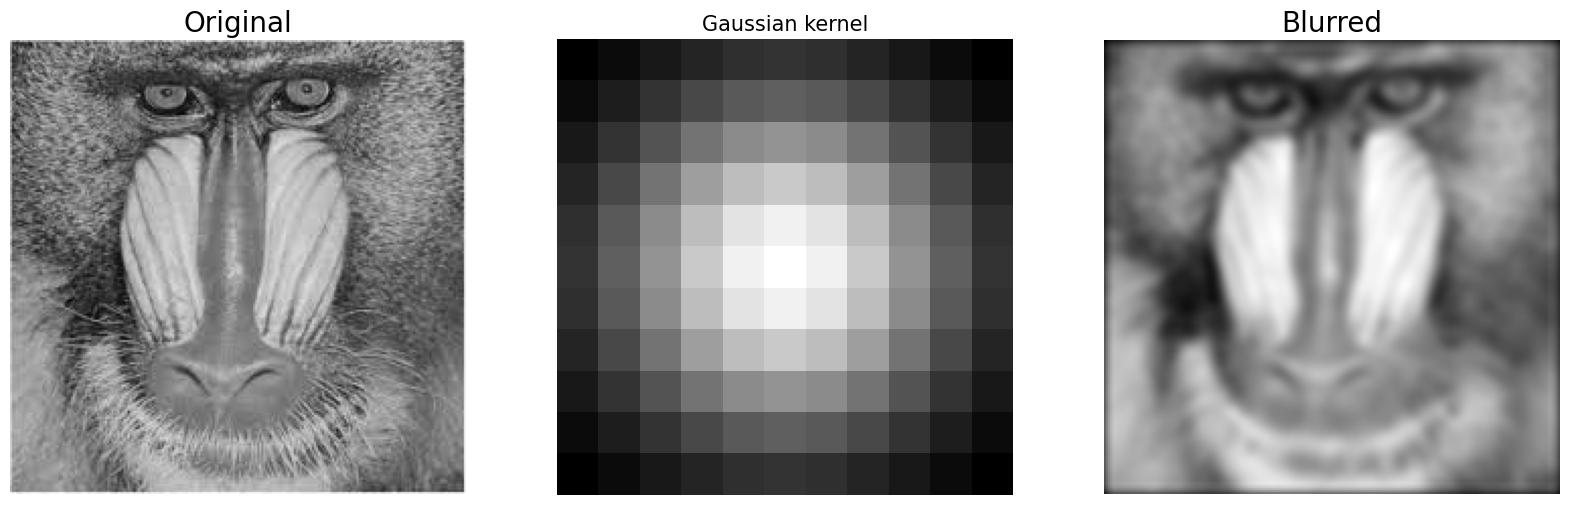

In [15]:
import imageio

im = np.mean(imageio.imread('D:/ĐH/Xử lý ảnh/BTL/images/mandrill.jpg'), axis=2)
print(im.shape)
gauss_kernel = np.outer(gaussian(11, 3), gaussian(11, 3))
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')
fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20,8))
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\3515630317.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\3515630317.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)


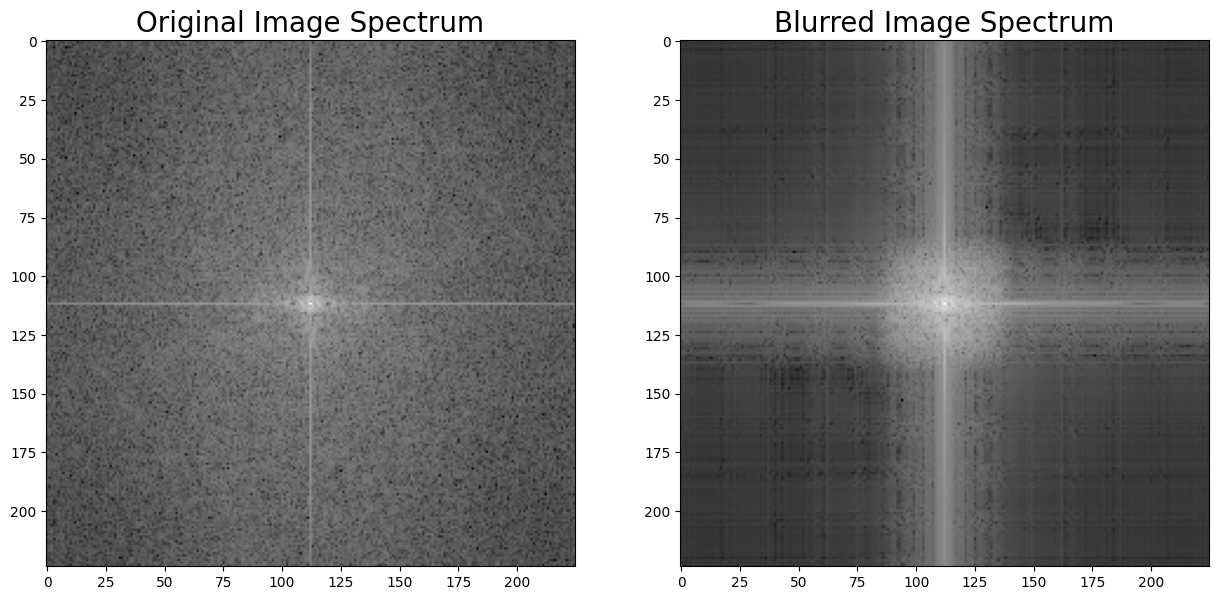

In [16]:
import scipy.fftpack as fftpack
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.figure(figsize=(15,8))
pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Original Image Spectrum', size=20)
F1 = fftpack.fft2((im_blurred).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Blurred Image Spectrum', size=20)
pylab.show()

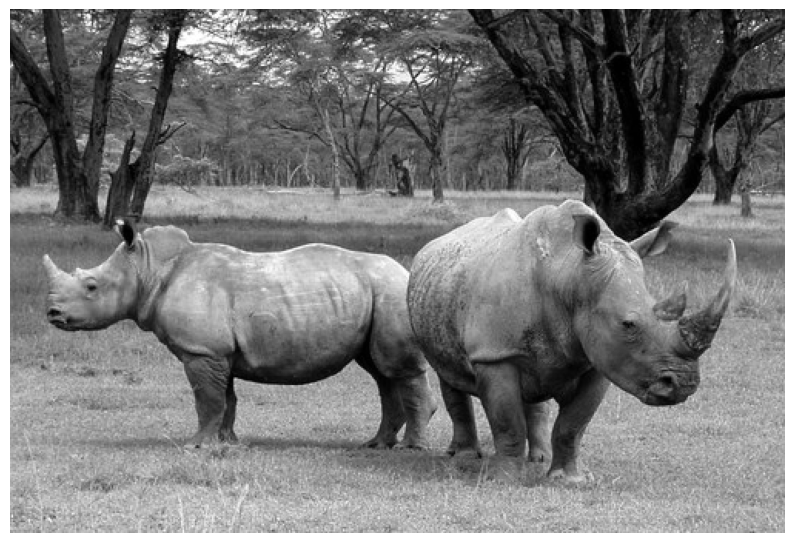

((-0.5, 502.5, 339.5, -0.5), None)

In [17]:
im = np.array(Image.open('D:/ĐH/Xử lý ảnh/BTL/images/rhino.jpg').convert('L'))
pylab.figure(figsize=(10,10)), pylab.imshow(im, cmap=pylab.cm.gray),
pylab.axis('off'), pylab.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\575726222.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()


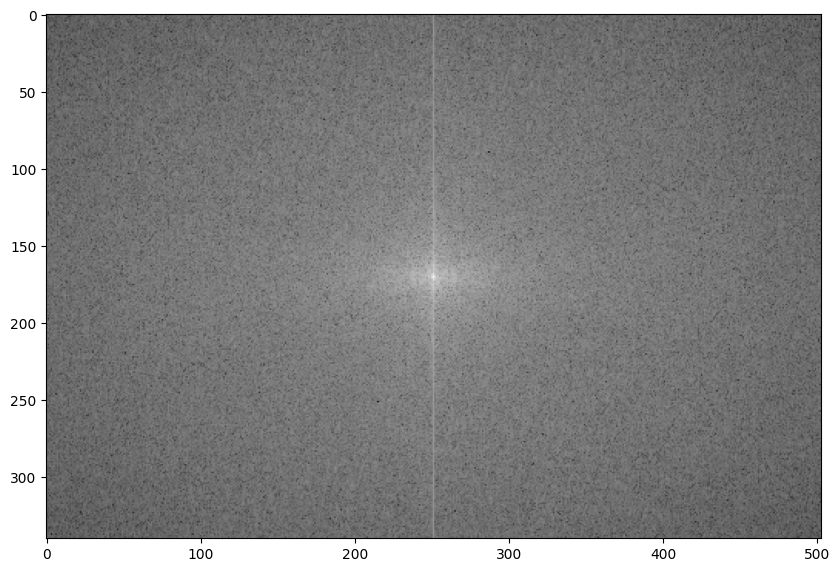

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [18]:
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_34388\1110417932.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


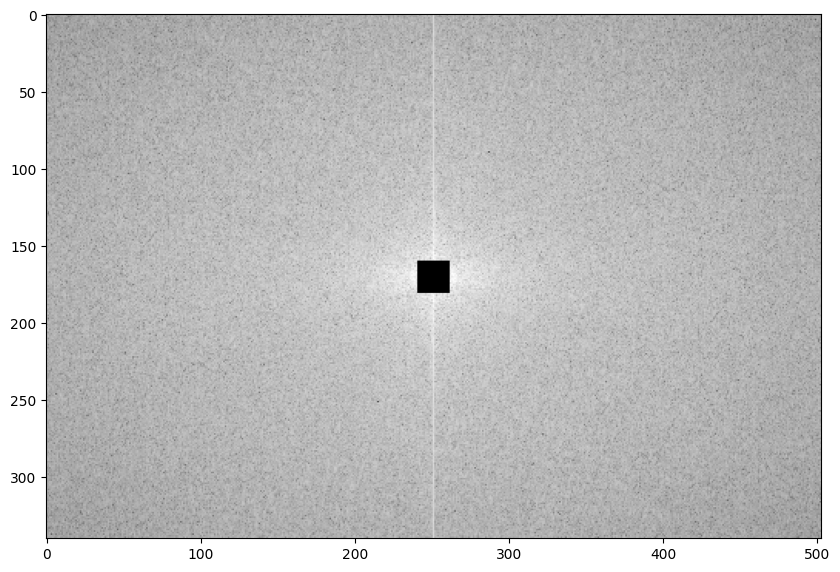

In [19]:
freq2[half_w-10:half_w+11,half_h-10:half_h+11] = 0 
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

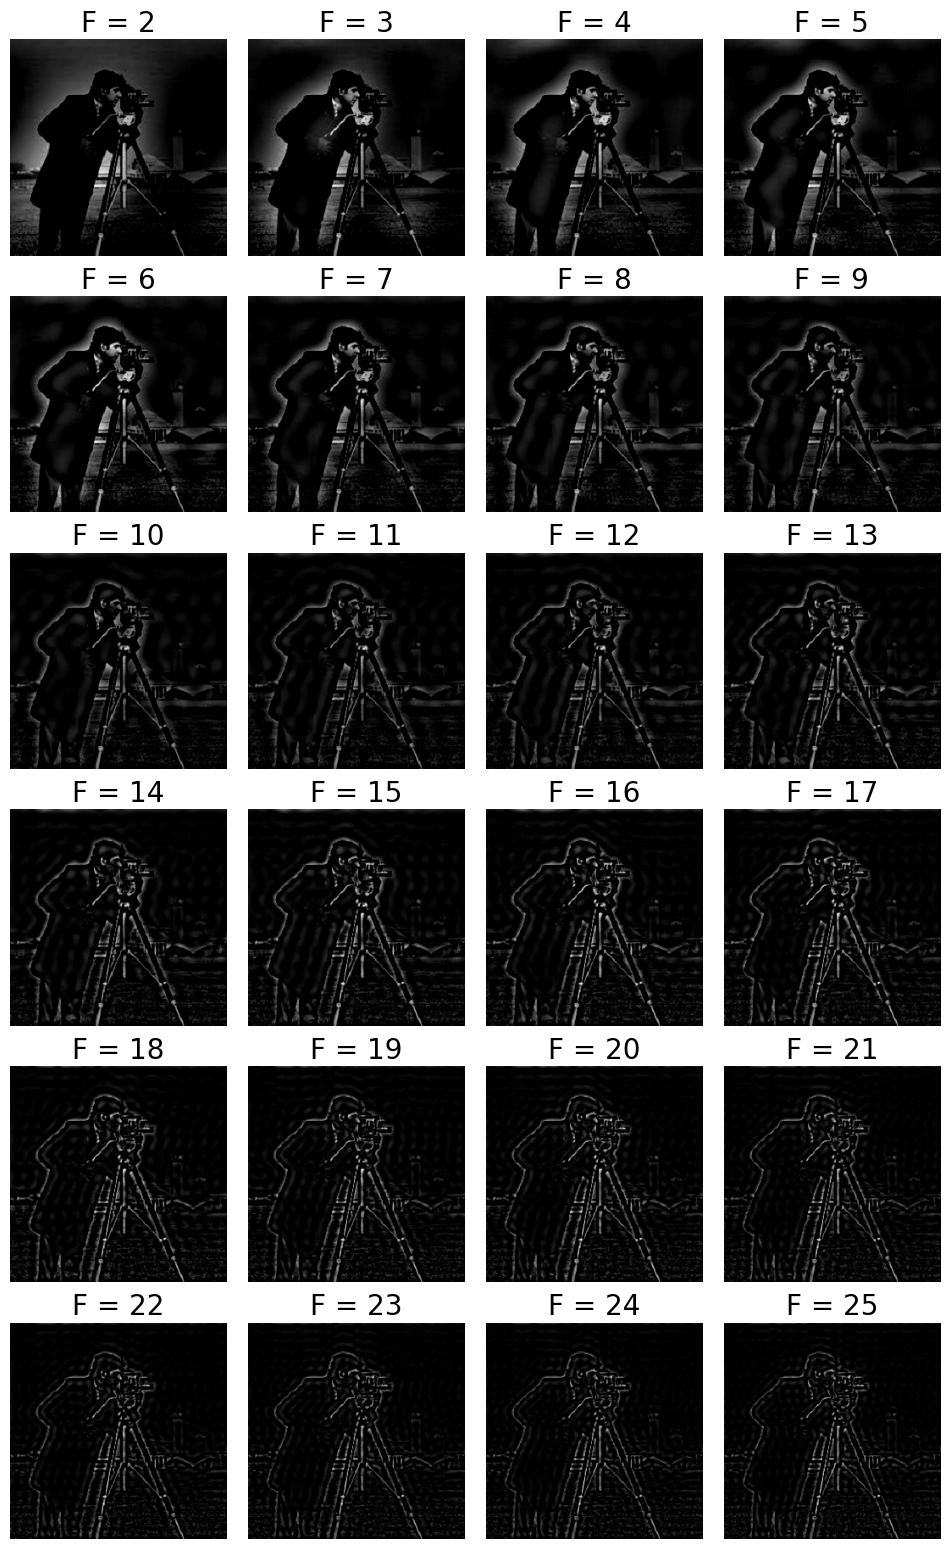

In [21]:
# Đọc ảnh và chuyển thành grayscale
im = np.array(Image.open('D:/ĐH/Xử lý ảnh/BTL/images/cameraman.jpg').convert('L'))

# Biến đổi Fourier 2D
freq = fftpack.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w / 2), int(h / 2)

# Hàm tính SNR
def calculate_snr(image):
    signal = np.mean(image)  # Giá trị trung bình
    noise = np.std(image)    # Độ lệch chuẩn
    return signal / noise    # Tính SNR

snrs_hp = []
lbs = list(range(1, 25))
pylab.figure(figsize=(12, 20))

# Lặp qua các kích thước bộ lọc
for l in lbs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2[half_w - l:half_w + l + 1, half_h - l:half_h + l + 1] = 0  # Loại bỏ tần số thấp
    im1 = np.clip(fftpack.ifft2(fftpack.ifftshift(freq2)).real, 0, 255)  # Biến đổi ngược
    snrs_hp.append(calculate_snr(im1))  # Tính SNR
    pylab.subplot(6, 4, l)
    pylab.imshow(im1, cmap='gray')
    pylab.axis('off')
    pylab.title(f'F = {l + 1}', size=20)

pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()


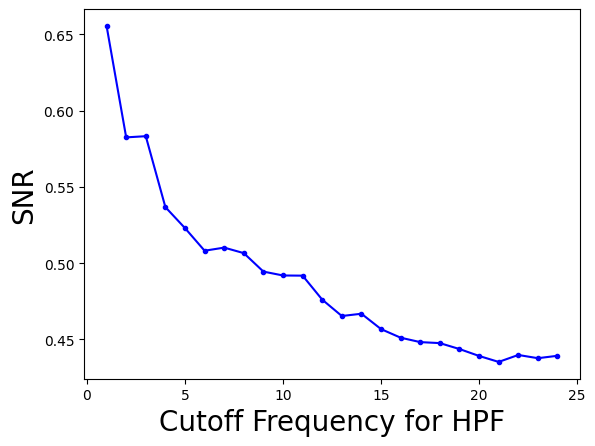

In [22]:
pylab.plot(lbs, snrs_hp, 'b.-')
pylab.xlabel('Cutoff Frequency for HPF', size=20)
pylab.ylabel('SNR', size=20)
pylab.show()

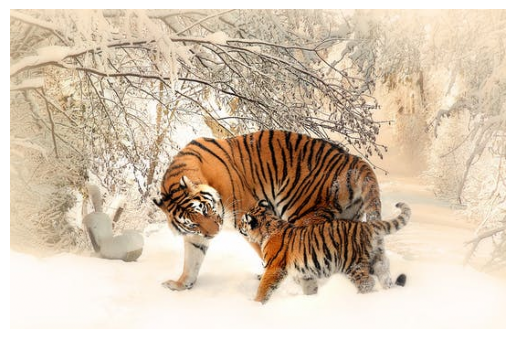

0.7832723415957195


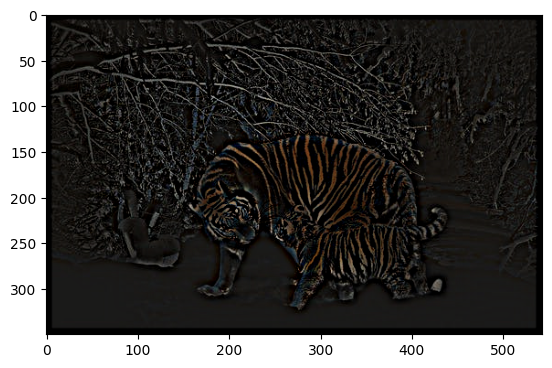

In [24]:
from skimage import img_as_float
im = img_as_float(pylab.imread('D:/ĐH/Xử lý ảnh/BTL/images/tigers.jpeg'))
pylab.figure(), pylab.imshow(im), pylab.axis('off'), pylab.show()
x = np.linspace(-10, 10, 15)
kernel_1d = np.exp(-0.005*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
kernel_1d = np.exp(-5*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel2 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :,
np.newaxis]
im = signal.fftconvolve(im, DoGKernel, mode='same')
pylab.figure(), pylab.imshow(np.clip(im, 0, 1)), print(np.max(im)),
pylab.show()

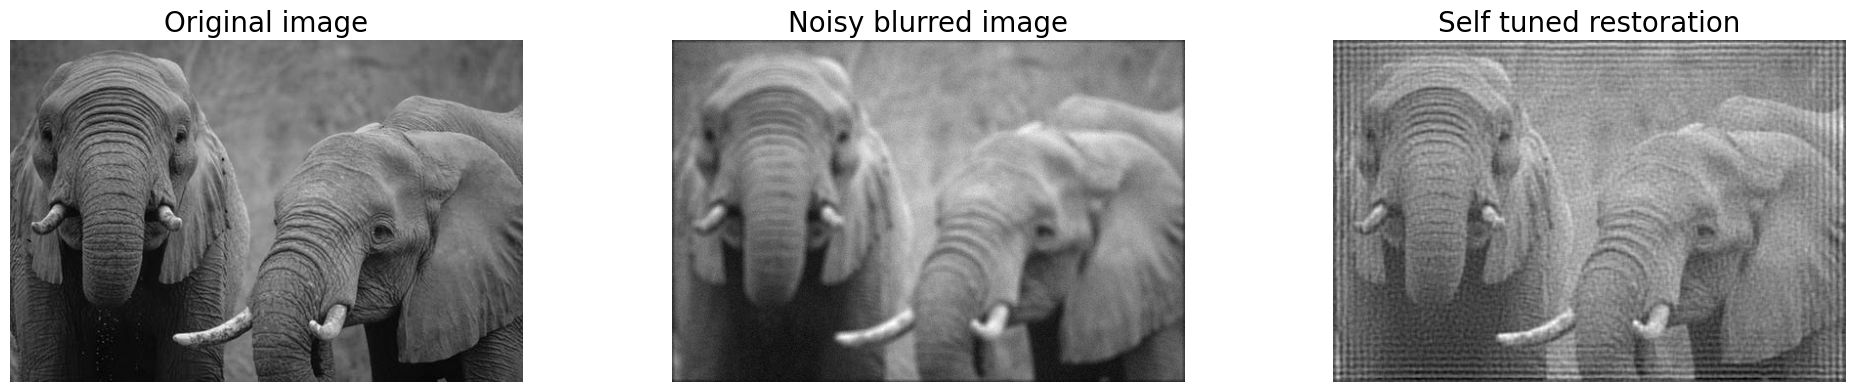

In [32]:
from skimage import color, data, restoration
im = color.rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/elephant_g.jpg'))
from scipy.signal import convolve2d as conv2
n = 7
psf = np.ones((n, n)) / n**2
im1 = conv2(im, psf, 'same')
im1 += 0.1 * im.std() * np.random.standard_normal(im.shape)
im2, _ = restoration.unsupervised_wiener(im1, psf)
fig, axes = pylab.subplots(nrows=1, ncols=3, figsize=(20, 4), sharex=True, sharey=True)
pylab.gray()
axes[0].imshow(im), axes[0].axis('off'), axes[0].set_title('Original image', size=20)
axes[1].imshow(im1), axes[1].axis('off'), axes[1].set_title('Noisy blurred image', size=20)
axes[2].imshow(im2), axes[2].axis('off'), axes[2].set_title('Self tuned restoration', size=20)
fig.tight_layout()
pylab.show()

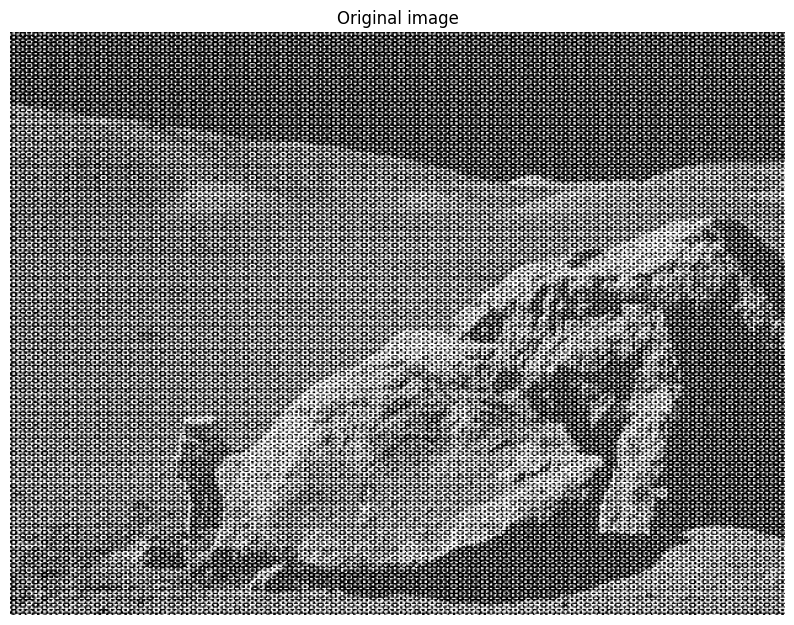

(<matplotlib.image.AxesImage at 0x2499ea7b560>,
 (-0.5, 629.5, 473.5, -0.5),
 Text(0.5, 1.0, 'Original image'),
 None)

In [34]:
im = pylab.imread('D:/ĐH/Xử lý ảnh/BTL/images/moonlanding.png').astype(float)
pylab.figure(figsize=(10,10))
pylab.imshow(im, pylab.cm.gray), pylab.axis('off'), pylab.title('Original image'), pylab.show()

Text(0.5, 1.0, 'Spectrum with Fourier transform')

<Figure size 640x480 with 0 Axes>

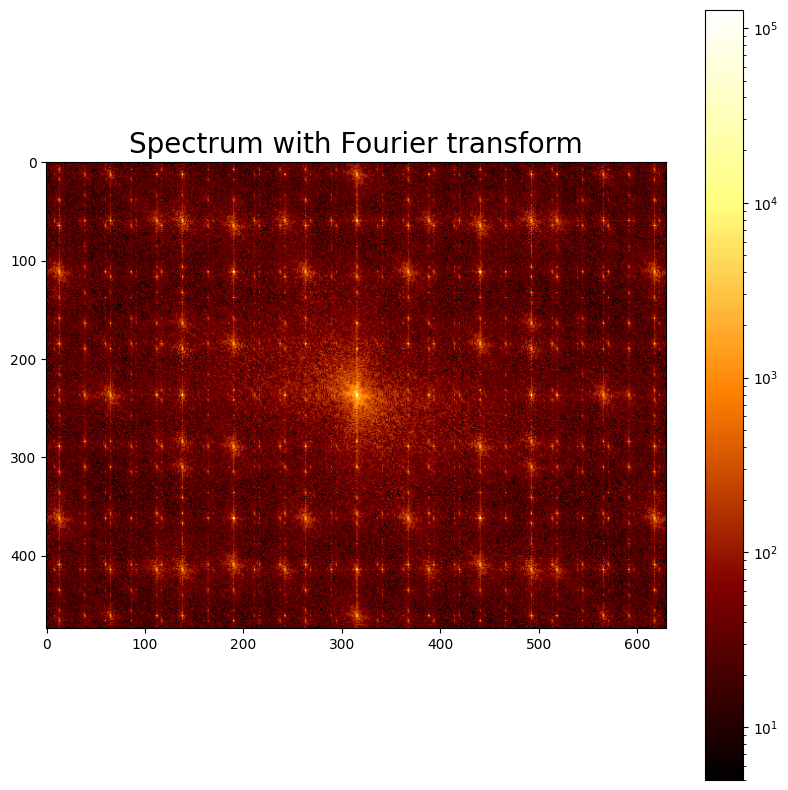

In [36]:
from scipy import fftpack
from matplotlib.colors import LogNorm
im_fft = fftpack.fft2(im)
def plot_spectrum(im_fft):
    pylab.figure(figsize=(10,10))
    pylab.imshow(np.abs(im_fft), norm=LogNorm(vmin=5), cmap=pylab.cm.afmhot), pylab.colorbar()
pylab.figure(), plot_spectrum(fftpack.fftshift(im_fft))
pylab.title('Spectrum with Fourier transform', size=20)

(None, Text(0.5, 1.0, 'Filtered Spectrum'))

<Figure size 640x480 with 0 Axes>

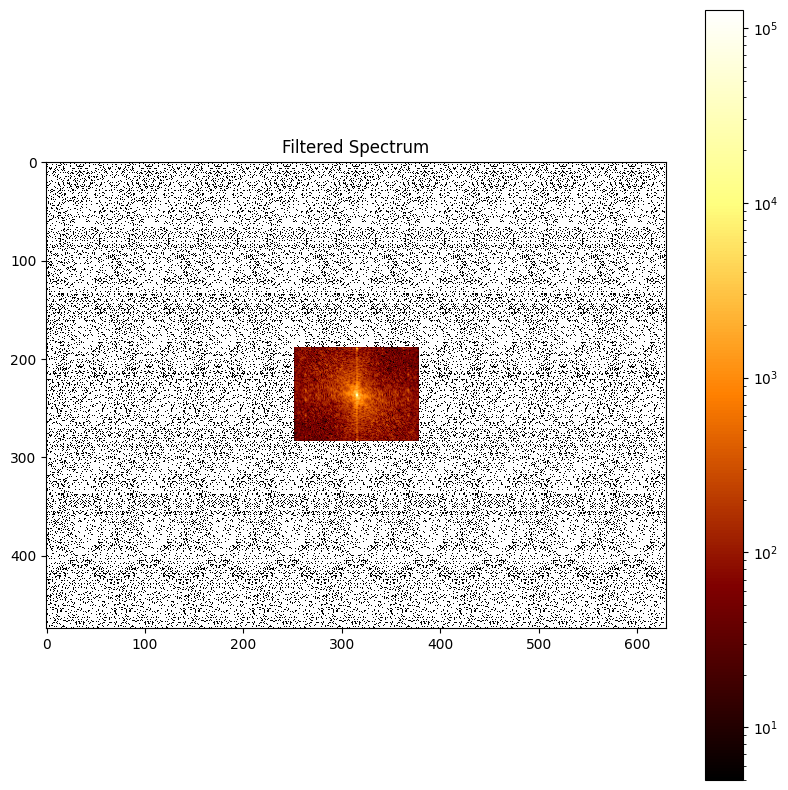

In [37]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
pylab.figure(),
plot_spectrum(fftpack.fftshift(im_fft2)),pylab.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

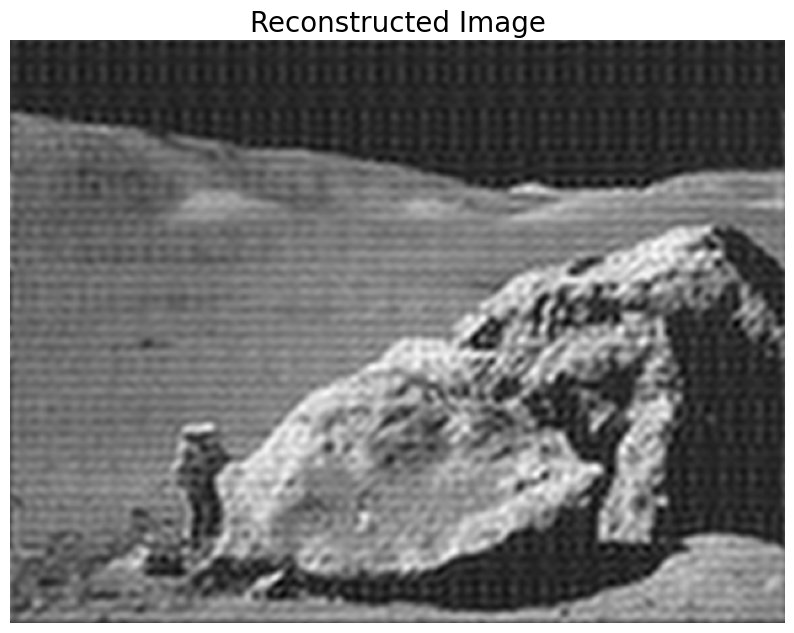

In [38]:
im_new = fp.ifft2(im_fft2).real
pylab.figure(figsize=(10,10)), pylab.imshow(im_new, pylab.cm.gray),
pylab.axis('off')
pylab.title('Reconstructed Image', size=20)